# 3. 线性神经网络
在介绍深度神经网络之前，我们需要了解神经网络训练的基础知识。 本章我们将介绍神经网络的整个训练过程， 包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型。 为了更容易学习，我们将从经典算法————线性神经网络开始，介绍神经网络的基础知识。 经典统计学习技术中的线性回归和softmax回归可以视为线性神经网络， 这些知识将为本书其他部分中更复杂的技术奠定基础。

## 3.1. 线性回归
`回归（regression）`是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。
在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。**分类问题的目标是预测数据属于一组类别中的哪一个**。

## 3.1.1. 线性回归的基本元素
`线性回归（linear regression）`可以追溯到19世纪初， 它在回归的各种标准工具中最简单而且最流行。 线性回归基于几个简单的假设： 首先，假设自变量$\mathbf{x}$和因变量$\mathbf{y}$之间的关系是线性的， 即$\mathbf{y}$可以表示为$\mathbf{x}$中元素的加权和，这里通常允许包含观测值的一些噪声； 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。
为了解释线性回归，我们举一个实际的例子： 我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。 为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。 这个数据集包括了房屋的销售价格、面积和房龄。 在机器学习的术语中，该数据集称为`训练数据集（training data set）` 或`训练集（training set）`。 每行数据（比如一次房屋交易相对应的数据）称为`样本（sample）`， 也可以称为`数据点（data point）或数据样本（data instance）`。 我们把试图`预测的目标（比如预测房屋价格）称为标签（label）或目标（target）`。 预测所依据的`自变量（面积和房龄）称为特（feature）或协变量（covariate）`。

通常，我们使用$n$来表示数据集中的样本数。对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，其对应的标签是$y^{(i)}$。

#### 3.1.1.1. 线性模型
线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：
$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.(3.1.1) $$

(3.1.1)中的$w_{\mathrm{area}}$和$w_{\mathrm{age}}$ 称为权重（weight），**权重决定了每个特征对我们预测值的影响**。 $b$称为偏置`（bias）、偏移量（offset）或截距（intercept）`。 **偏置是指当所有特征都取值为0时，预测值应该为多少**。 即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。 如果没有偏置项，我们模型的表达能力将受到限制。 严格来说，(3.1.1)是输入特征的一个`仿射变换（affine transformation）`。 **仿射变换的特点是通过加权和对特征进行线性变换（linear transformation）， 并通过偏置项来进行平移（translation）**。

给定一个数据集，我们的目标是寻找模型的权重$\mathbf{w}$和偏置$b$，使得根据模型做出的预测大体符合数据里的真实价格。输出的预测值由输入特征通过线性模型的仿射变换决定，仿射变换由所选权重和偏置确定。

而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。 当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$（通常使用“尖角”符号表示$y$的估计值）表示为：
$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.(3.1.2)$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中， 并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$
中， 我们可以用点积形式来简洁地表达模型：
$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.(3.1.3)$$
在 (3.1.3)中， 向量$\mathbf{x}$对应于单个数据样本的特征。 用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$可以很方便地引用我们整个数据集的$n$个样本。 其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。

对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$可以通过矩阵-向量乘法表示为：
$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b.(3.1.4)$$

这个过程中的求和将使用广播机制 （广播机制在 2.1.3节中有详细介绍）。 给定训练数据特征$\mathbf{X}$和对应的已知标签
$\mathbf{y}$，线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$： 当给定从$\mathbf{X}$的同分布中取样的新样本特征时，这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。

虽然我们相信给定$\mathbf{x}$预测$y$的最佳模型会是线性的， 但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1 \leq i \leq n$，$y^{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)}+b$。 无论我们使用什么手段来观察特征$\mathbf{X}$和标签$\mathbf{y}$，都可能会出现少量的观测误差。 因此，即使确信特征与标签的潜在关系是线性的， 我们也会加入一个噪声项来考虑观测误差带来的影响。

在开始寻找最好的**模型参数（model parameters）** $\mathbf{w}$和 $b$之前，我们还需要两个东西：
- 一种模型质量的度量方式； 
- 一种能够更新模型以提高模型预测质量的方法。

#### 3.1.1.2. 损失函数
在我们开始考虑如何用**模型拟合（fit）数据**之前，我们需要确定一个拟合程度的度量。 **损失函数（loss function）能够量化目标的实际值与预测值之间的差距**。 **通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0**。 回归问题中最常用的损失函数是平方误差函数。 当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时， 平方误差可以定义为以下公式:
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2. (3.1.5)$$

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些 （因为当我们对损失函数求导后常数系数为1）。 由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。 为了进一步说明，来看下面的例子。 我们为一维情况下的回归问题绘制图像，如 图3.1.1所示。<br>
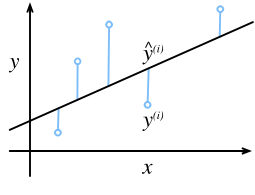<br>
图3.1.1 用线性模型拟合数据。

由于平方误差函数中的二次方项， 估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。
$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2. (3.1.6)$$
在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$）， 这组参数能最小化在所有训练样本上的总损失。如下式：
$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).(3.1.7)$$

#### 3.1.1.3. 解析解
线性回归刚好是一个很简单的优化问题。 与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来，这类解叫作解析解（analytical solution）。 首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。 我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。 将损失关于$\mathbf{w}$的导数设为0，得到解析解：
$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.(3.1.8)$$
像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

#### 3.1.1.4. 随机梯度下降
即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。 在许多任务上，那些难以优化的模型效果要更好。 因此，弄清楚如何训练这些难以优化的模型是非常重要的。

本书中我们用到一种名为**梯度下降（gradient descent）的方法**， 这种方法几乎可以优化所有深度学习模型。**它通过不断地在损失函数递减的方向上更新参数来降低误差**。

梯度下降最简单的用法是计算**损失函数（数据集中所有样本的损失均值） 关于模型参数的导数（在这里也可以称为梯度）**。 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。 因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本， 这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$， 它是由固定数量的训练样本组成的。 然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。 最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：
$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).(3.1.9)$$
 
总结一下，算法的步骤如下：（1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式:
$$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}
(3.1.10)$$

公式 (3.1.10)中的$\mathbf{w}$和$\mathbf{x}$都是向量。 在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。$|\mathcal{B}|$表示每个小批量中的样本数，这也称为**批量大小（batch size）**。$\eta$ 表示**学习率（learning rate）**。 **批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的**。 **这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）**。 **调参（hyperparameter tuning）是选择超参数的过程**。 超参数通常是我们根据训练迭代结果来调整的， 而训练迭代结果是在独立的**验证数据集（validation dataset）** 上评估得到的。
在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后）， 我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。 但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。 因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。 但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在**训练集上**的损失达到最小。 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）。

#### 3.1.1.5. 用模型进行预测
给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。 **给定特征估计目标的过程通常称为预测（prediction）或推断（inference）**。
本书将尝试坚持使用**预测**这个词。 虽然推断这个词已经成为深度学习的标准术语，但其实推断这个词有些用词不当。 在统计学中，推断更多地表示基于数据集估计参数。 当深度学习从业者与统计学家交谈时，术语的误用经常导致一些误解。

### 3.1.2. 矢量化加速
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在`Python`中编写开销高昂的`for`循环。

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

由于在本书中我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [3]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。首先，我们使用for循环，每次执行一位的加法。

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.03876 sec'

或者，我们使用重载的+运算符来计算按元素的和。

In [5]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00008 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。


### 3.1.3. 正态分布与平方损失
接下来，我们通过对噪声分布的假设来解读平方损失目标函数。
正态分布和线性回归之间的关系很密切。 `正态分布（normal distribution），也称为高斯分布（Gaussian distribution）`， 最早由德国数学家高斯（Gauss）应用于天文学研究。 简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$(标准差$\sigma$)，其正太分布概率密度函数如下：
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).(3.1.11)$$
下面我们定义一个Python函数来计算正态分布。

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

我们现在可视化正态分布。

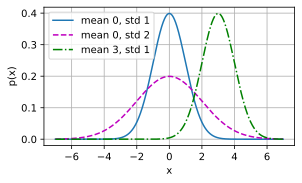

In [7]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

就像我们所看到的，改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。
均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是： 我们假设了观测中包含噪声，其中噪声服从正态分布。 噪声正态分布如下式:
$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,(3.1.12)$$
其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。

因此，我们现在可以写出通过给定的$\mathbf{x}$观测到特定$y$的似然（likelihood）：
$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right). (3.1.13)$$
 
现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的似然最大的值：
$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).(3.1.14)$$
 
根据极大似然估计法选择的估计量称为极大似然估计量。 虽然使许多指数函数的乘积最大化看起来很困难， 但是我们可以在不改变目标的前提下，通过最大化似然对数来简化。 由于历史原因，优化通常是说最小化而不是最大化。 我们可以改为最小化负对数似然$-\log P(\mathbf y \mid \mathbf X)$。 由此可以得到的数学公式是：
$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.(3.1.15)$$
现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项， 因为第一项不依赖于$\mathbf{w}$和$b$。 现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。 幸运的是，上面式子的解并不依赖于$\sigma$。 因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

### 3.1.4. 从线性回归到深度网络
到目前为止，我们只谈论了线性模型。 尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型， 从而把线性模型看作一个神经网络。 首先，我们用“层”符号来重写这个模型。
#### 3.1.4.1. 神经网络图
深度学习从业者喜欢绘制图表来可视化模型中正在发生的事情。 在图3.1.2中，我们将线性回归模型描述为一个神经网络。 需要注意的是，该图只显示连接模式，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。<br>
![image.png](https://zh.d2l.ai/_images/singleneuron.svg) <br>
图3.1.2 线性回归是一个单层神经网络。

在图3.1.2所示的神经网络中，输入为$x_1, \ldots, x_d$，因此输入层中的输入数（或称为特征维度，feature dimensionality）为
$d$。网络的输出为$o_1$，因此输出层中的输出数是1。需要注意的是，输入值都是已经给定的，并且只有一个计算神经元。 由于模型重点在发生计算的地方，所以通常我们在计算层数时不考虑输入层。 也就是说， 图3.1.2中神经网络的层数为1。 我们可以将线性回归模型视为仅由单个人工神经元组成的神经网络，或称为单层神经网络。

对于线性回归，**每个输入都与每个输出（在本例中只有一个输出）相连， 我们将这种变换（ 图3.1.2中的输出层） 称为全连接层（fully-connected layer）或称为稠密层（dense layer）**。下一章将详细讨论由这些层组成的网络。

#### 3.1.4.2. 生物学
线性回归发明的时间（1795年）早于计算神经科学，所以将线性回归描述为神经网络似乎不合适。当控制学家、神经生物学家沃伦·麦库洛奇和沃尔特·皮茨开始开发人工神经元模型时， 他们为什么将线性模型作为一个起点呢？ 我们来看一张图片 图3.1.3： 这是一张由树突（dendrites，输入终端）、 细胞核（nucleus，CPU）组成的生物神经元图片。 轴突（axon，输出线）和轴突端子（axon terminal，输出端子） 通过突触（synapse）与其他神经元连接。<br>
![image.png](https://zh.d2l.ai/_images/neuron.svg) <br>
图3.1.3 真实的神经元。


树突中接收到来自其他神经元（或视网膜等环境传感器）的信息$x_i$。该信息通过突触权重$w_i$来加权，以确定输入的影响（即，通过$x_i w_i$相乘来激活或抑制）。 来自多个源的加权输入以加权和$y = \sum_i x_i w_i + b$的形式汇聚在细胞核中， 然后将这些信息发送到轴突$y$中进一步处理，通常会通过$\sigma(y)$进行一些非线性处理。 之后，它要么到达目的地（例如肌肉），要么通过树突进入另一个神经元。

当然，许多这样的单元可以通过正确连接和正确的学习算法拼凑在一起， 从而产生的行为会比单独一个神经元所产生的行为更有趣、更复杂， 这种想法归功于我们对真实生物神经系统的研究。
当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感。 我们援引斯图尔特·罗素和彼得·诺维格在他们的经典人工智能教科书 Artificial Intelligence:A Modern Approach (Russell and Norvig, 2016) 中所说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。 同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。

### 3.1.5. 小结
- 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
- 矢量化使数学表达上更简洁，同时运行的更快。
- 最小化目标函数和执行极大似然估计等价。
- 线性回归模型也是一个简单的神经网络。